# Лабораторная работа 09-11. Линейные модели: Регрессия

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1: Простая линейная регрессия.
Используйте набор данных "Boston Housing" из sklearn.datasets. Постройте модель линейной регрессии, сделайте предсказания и вычислите MSE (Mean Squared Error).

In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = fetch_california_housing(as_frame=True).frame
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Рассмотрим общую информацию о наборе данных. Проверим, есть ли пропущенные значения

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Выведем основные описательные статистики набора данных

In [13]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Выделим в переменную X матрицу признаков, а в переменную y -- значения зависимой величины.

In [15]:
X = fetch_california_housing(as_frame=True).data
y = fetch_california_housing(as_frame=True).target

Обучим модель линейной регрессии и сделаем прогноз

In [18]:
linear_regression = LinearRegression()
linear_regression.fit(X, y)
y_pred = linear_regression.predict(X)

Выведем ошибку MSE

In [19]:
mean_squared_error(y, y_pred)

0.5243209861846072

## Задание 2: Использование кросс-валидации.
С использованием того же набора данных проведите k-fold кросс-валидацию (k=10) для своей модели и сравните среднее значения MSE на всех фолдах.

In [54]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.metrics import make_scorer

mse = make_scorer(mean_squared_error,greater_is_better=False)

k_fold_cv = RepeatedKFold(n_splits=10)

scores = cross_val_score(estimator=linear_regression, 
                         X=X, 
                         y=y, 
                         scoring=mse, 
                         cv=k_fold_cv, 
                         n_jobs=-1)

np.mean(np.absolute(scores))

0.5288508516644636

## Задание 3: Построение Ridge регрессии.
Примените Ridge регрессию к набору данных "Boston Housing". Подберите гиперпараметр `alpha` через кросс-валидацию. 

Задаим $\alpha \in (10^{-5}, 10^5)$ и с помощью кросс-валидации на сетке этих значений подберем наилучшее в смысле MSE.

In [60]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

grid = {'alpha' : np.logspace(-5, 5, 200)}

ridge_regression = Ridge()
grid_search_cv = GridSearchCV(ridge_regression, grid, scoring=mse)
grid_search_cv.fit(X, y)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-05, 1.12266777e-05, 1.26038293e-05, 1.41499130e-05,
       1.58856513e-05, 1.78343088e-05, 2.00220037e-05, 2.24780583e-05,
       2.52353917e-05, 2.83309610e-05, 3.18062569e-05, 3.57078596e-05,
       4.00880633e-05, 4.50055768e-05, 5.05263107e-05, 5.67242607e-05,
       6.36824994e-05, 7.14942899e-05, 8.02643352e-05, 9.01101...
       1.10975250e+04, 1.24588336e+04, 1.39871310e+04, 1.57029012e+04,
       1.76291412e+04, 1.97916687e+04, 2.22194686e+04, 2.49450814e+04,
       2.80050389e+04, 3.14403547e+04, 3.52970730e+04, 3.96268864e+04,
       4.44878283e+04, 4.99450512e+04, 5.60716994e+04, 6.29498899e+04,
       7.06718127e+04, 7.93409667e+04, 8.90735464e+04, 1.00000000e+05])},
             scoring=make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'))

Установим полученное наилучшее $\alpha$ как параметр в Ridge модель

In [61]:
ridge_regression.set_params(**grid_search_cv.best_params_)

Ridge(alpha=68.26071834272393)

In [62]:
ridge_regression.fit(X, y)
y_pred = ridge_regression.predict(X)

In [63]:
mean_squared_error(y, y_pred)

0.5244579505797672

## Задание 4: Построение Lasso регрессии.
Также примените Lasso регрессию к тем же данным. При подборе гиперпараметра `alpha` через кросс-валидацию сравните количество нулевых весов в модели с результатами Ridge регрессии.

Поступаем аналогичным образом, как и с предыдущим пунктом

In [65]:
from sklearn.linear_model import Lasso

grid = {'alpha' : np.logspace(-5, 5, 200)}

lasso_regression = Lasso()
grid_search_cv = GridSearchCV(lasso_regression, grid, scoring=mse)
grid_search_cv.fit(X, y)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-05, 1.12266777e-05, 1.26038293e-05, 1.41499130e-05,
       1.58856513e-05, 1.78343088e-05, 2.00220037e-05, 2.24780583e-05,
       2.52353917e-05, 2.83309610e-05, 3.18062569e-05, 3.57078596e-05,
       4.00880633e-05, 4.50055768e-05, 5.05263107e-05, 5.67242607e-05,
       6.36824994e-05, 7.14942899e-05, 8.02643352e-05, 9.01101...
       1.10975250e+04, 1.24588336e+04, 1.39871310e+04, 1.57029012e+04,
       1.76291412e+04, 1.97916687e+04, 2.22194686e+04, 2.49450814e+04,
       2.80050389e+04, 3.14403547e+04, 3.52970730e+04, 3.96268864e+04,
       4.44878283e+04, 4.99450512e+04, 5.60716994e+04, 6.29498899e+04,
       7.06718127e+04, 7.93409667e+04, 8.90735464e+04, 1.00000000e+05])},
             scoring=make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'))

In [73]:
lasso_regression.set_params(**grid_search_cv.best_params_)
lasso_regression.fit(X, y)
y_pred = lasso_regression.predict(X)
mean_squared_error(y, y_pred)

0.5243420639824502

Рассмотрим количество нулевых коэффициентов в моделях Ridge и Lasso

In [71]:
np.count_nonzero(ridge_regression.coef_ == 0)

0

In [72]:
np.count_nonzero(lasso_regression.coef_ == 0)

0

## Задание 5: Использование других функций потерь.
Используйте набор данных diabetes из sklearn.datasets и постройте модель HuberRegressor - линейную модель с функцией потерь Хьюбера, которая менее чувствительна к выбросам по сравнению с MSE.

In [79]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import HuberRegressor

data = load_diabetes(as_frame=True).frame
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Рассмотрим, есть ли пропущенные значения

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


Рассмотрим описательные статистики

In [77]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [78]:
X = load_diabetes(as_frame=True).data
y = load_diabetes(as_frame=True).target

In [81]:
huber_reg = HuberRegressor(max_iter=10000)
huber_reg.fit(X, y)

y_pred = huber_reg.predict(X)
mean_squared_error(y, y_pred)

2875.1336801760217

## Задание 6: Исследование эффекта масштабирования признаков.
Используйте любой набор данных с числовыми признаками. Тренируйте модели Ridge и Lasso регрессии на исходных данных и предобработанных данных (используйте стандартизацию и нормализацию). Сравните коэффициенты моделей, полученных для исходных и предобработанных данных.

Возьмем данные из прошлого задания. Обучим на них модели Ridge и Lasso

In [83]:
ridge_regression = Ridge()
ridge_regression.fit(X, y)

Ridge()

In [84]:
lasso_regression = Lasso()
lasso_regression.fit(X, y)

Lasso()

Сохраним коэффициенты в отдельные переменные

In [86]:
ridge_coef = ridge_regression.coef_
lasso_coef = lasso_regression.coef_

Теперь стандартизируем и нормализуем данные и обучим снова Ridge и Lasso

In [90]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standartizer = StandardScaler()
X_stand = standartizer.fit_transform(X, y)

normalizer = MinMaxScaler()
X_norm = normalizer.fit_transform(X, y)

In [95]:
ridge_regression.fit(X_stand, y)
lasso_regression.fit(X_stand, y)

ridge_coef_stand = ridge_regression.coef_
lasso_coef_stand = lasso_regression.coef_

ridge_regression.fit(X_norm, y)
lasso_regression.fit(X_norm, y)

ridge_coef_norm = ridge_regression.coef_
lasso_coef_norm = lasso_regression.coef_

In [101]:
pd.DataFrame({'ridge default' : ridge_coef, 
              'ridge standarted' : ridge_coef_stand, 
              'ridge normalized' : ridge_coef_norm, 
              'lasso default' : lasso_coef,
              'lasso standarted' : lasso_coef_stand,
              'lasso normaziled' : lasso_coef_norm})

,ridge default,ridge standarted,ridge normalized,lasso default,lasso standarted,lasso normaziled
0,29.466112,-0.431173,-0.122670,0.000000,-0.000000,0.000000
1,-83.154276,-11.333655,-22.076937,-0.000000,-9.319413,-10.917652
2,306.352680,24.771242,130.079387,367.703860,24.831276,129.433413
3,201.627734,15.373473,76.775654,6.298858,14.088706,57.750063
4,5.909614,-30.088401,-33.163331,0.000000,-4.838928,-0.000000
5,-29.515495,16.653152,-15.502458,0.000000,-0.000000,-0.000000
6,-152.040280,1.462107,-51.171004,-0.000000,-10.622799,-44.502059
7,117.311732,7.521111,31.261104,0.000000,0.000000,0.000000
8,262.944290,32.843751,121.081338,307.605418,24.420811,114.679613
9,111.878956,3.266385,22.393614,0.000000,2.562130,0.000000


## Задание 7: Изучение влияния регуляризации.
Выберите набор данных с высокой размерностью признаков. Создайте модели Lasso и Ridge регрессии. Проведите эксперименты с различными степенями регуляризации и установите, как они влияют на производительность модели и распределение весов признаков.

In [102]:
X = fetch_california_housing(as_frame=True).data
y = fetch_california_housing(as_frame=True).target

mse_ridge = []
mse_lasso = []

for alpha in np.logspace(-5, 5, 200):
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)

    ridge.fit(X, y)
    lasso.fit(X, y)

    y_pred = ridge.predict(X)
    mse_ridge.append(mean_squared_error(y, y_pred))
    
    y_pred = lasso.predict(X)
    mse_lasso.append(mean_squared_error(y, y_pred))

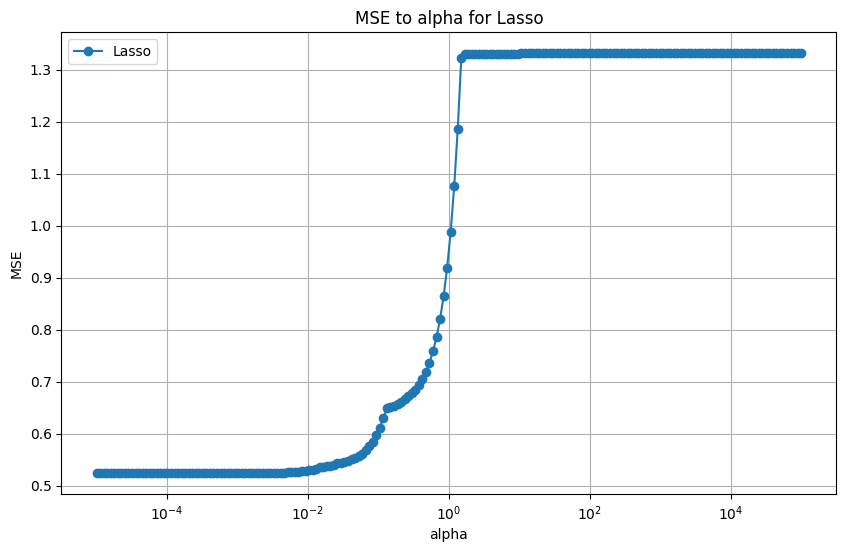

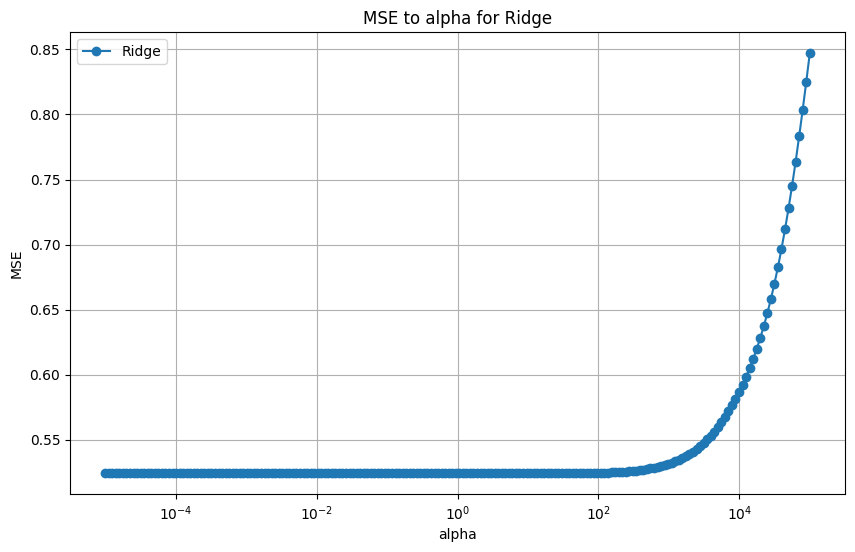

In [106]:
for label, mse in zip(['Lasso', 'Ridge'], [mse_lasso, mse_ridge]):
    plt.figure(figsize=(10, 6))
    plt.title(f'MSE to alpha for {label}')

    plt.plot(np.logspace(-5, 5, 200), mse, marker='o', label=label)
    plt.xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('MSE')
    plt.grid(True)
    plt.legend()
    plt.show()

## Задание 8: Регрессия с использованием метода эластичной сети.
На том же наборе данных обучите ElasticNet, который объединяет L1 и L2 регуляризацию. Экспериментируйте с разными соотношениями L1 и L2 регуляризации и установите, как это влияет на производительность модели.

In [116]:
from sklearn.linear_model import ElasticNet
ratio = np.linspace(0.0001, 1, 10)

mse = []

for r in ratio:
    elasticnet = ElasticNet(l1_ratio=r, random_state=42)
    elasticnet.fit(X, y)

    y_pred = elasticnet.predict(X)
    mse.append(mean_squared_error(y, y_pred))

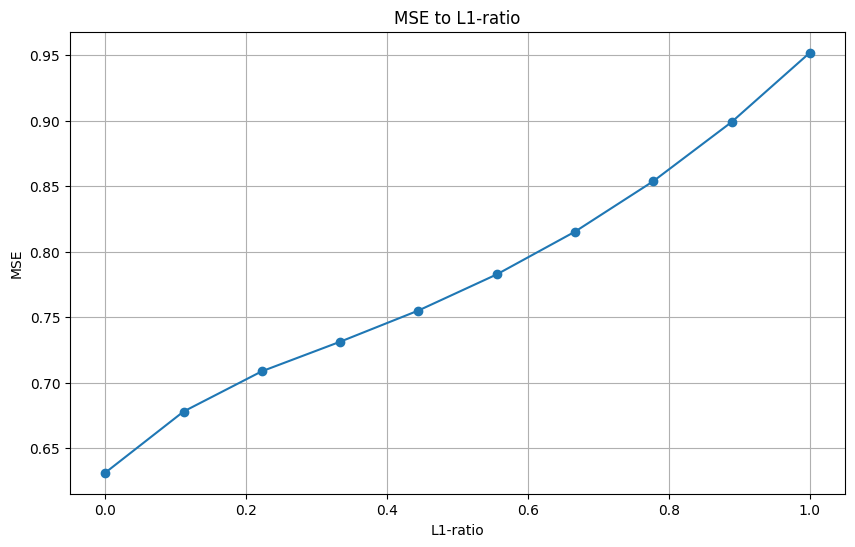

In [117]:
plt.figure(figsize=(10, 6))
plt.title('MSE to L1-ratio')

plt.plot(ratio, mse, marker='o')
plt.xlabel('L1-ratio')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

## Задание 9: Комбинирование методов отбора признаков и регуляризации.
Выберите подмножество признаков с помощью любого метода отбора признаков, а затем обучите модели с Lasso и Ridge регуляризацией. Сравнивай модели между собой и с моделью, построенной на всех признаках.

In [129]:
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

p_values = model.pvalues
ols_features = p_values[p_values < 0.05].index[1:]

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sat, 07 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:53:24   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.000     -38.233     -35.650
MedInc         0.4367      0.004    104.054      0.000       0.428       0.445
HouseAge       0.0094      0.000     21.143      0.000       0.009       0.010
AveRooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
AveBedrms      0.6451      0.028     22.928      0.000       0.590       0.700
Population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
AveOccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
Latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
Longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
ols_features

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude',
       'Longitude'],
      dtype='object')

In [134]:
X = fetch_california_housing(as_frame=True).data
y = fetch_california_housing(as_frame=True).target

In [135]:
ridge = Ridge()
ridge.fit(X, y)
y_pred = ridge.predict(X)
mean_squared_error(y, y_pred)

0.5243210214822195

In [138]:
ridge.fit(X[ols_features], y)
y_pred = ridge.predict(X[ols_features])
mean_squared_error(y, y_pred)

0.5243388375822255

In [136]:
lasso = Lasso()
lasso.fit(X, y)
y_pred = lasso.predict(X)
mean_squared_error(y, y_pred)

0.9517091796179769

In [140]:
lasso.fit(X[ols_features], y)
y_pred = lasso.predict(X[ols_features])
mean_squared_error(y, y_pred)

0.9511926497344407

## Задание 10: Использование метрик, устойчивых к выбросам.
Используйте набор данных diabetes из sklearn. и обучите модель HuberRegressor, которая менее чувствительна к выбросам по сравнению с MSE-метрикой. Сравните эту модель с базовой моделью линейной регрессии.

In [150]:
X = load_diabetes(as_frame=True).data
y = load_diabetes(as_frame=True).target

lr = LinearRegression()
hr = HuberRegressor(max_iter=1000)

cv = RepeatedKFold(n_splits=5)
print('Linear Regression CV: ', np.mean(cross_val_score(lr, X, y, cv=cv, n_jobs=-1)))
print('HuberRegressor CV: ', np.mean(cross_val_score(hr, X, y, cv=cv, n_jobs=-1)))

Linear Regression CV:  0.48473218206087054
HuberRegressor CV:  0.4744055083795757
